# Question 5.1

## import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

eps = np.finfo(float).eps

## Utility Functions

Line Plotter

In [2]:
def plotter(label_x, label_y, title, x_axis, y_axis, mark='', colr = 'blue'):
    plt.figure(num=None, figsize=(6, 4), dpi=175, facecolor='w', edgecolor='k')
    # plotting the points  
    plt.plot(x_axis, y_axis, marker = mark, color = colr, label = 'Error rate') 
    # naming the x axis 
    plt.xlabel(label_x) 
    # naming the y axis 
    plt.ylabel(label_y) 
    # giving a title to my graph 
    plt.title(title) 
    plt.grid(True)
    # function to show the plot 
    plt.show()

Mean square error

In [3]:
# Mean square error
def MSE(predicted , actual):
    return np.mean((np.array(actual) - np.array(predicted))**2)

Mean absolute error

In [4]:
# Mean absolute error
def MAE(predicted , actual):
    return np.mean(np.abs((np.array(actual) - np.array(predicted))))

Mean absolute percentage error function

In [5]:
# Mean absolute percentage error function
def MAPE(predicted , actual):
    return np.mean(np.abs((np.array(actual) - np.array(predicted))/ np.array(actual))) * 100

Normalising the data set to reduce range of values

In [6]:
def normalize(randomDataSet, columns):
    for attr in columns[:-1]:
        randomDataSet[attr] = (randomDataSet[attr] - randomDataSet[attr].min())/(randomDataSet[attr].max() - randomDataSet[attr].min())

In [7]:
def modify_dataset(dataSet):
    arrayDataSet = dataSet.values
    X = arrayDataSet[:,:-1]
    ones = np.ones([X.shape[0],1])
    X = np.concatenate((ones,X),axis=1)
    y = arrayDataSet[:,-1].reshape(-1,1)
    
    return X, y

Cost Function

In [8]:
def costFunction(X, y, theta, lamda):
    return (np.sum(np.square(np.dot(X,theta.T) - y)) + lamda*np.sum(np.square(theta[:,1:])))/(2*X.shape[0])



Gradient Decent Function

In [9]:
def gradientDecent(X, y, alpha, theta, lamda):
    theta[:,0] = theta[:,0] - alpha * np.sum((X[:,0].reshape(-1,1))*(np.dot(X , theta.T) - y) ,axis = 0)/X.shape[0]
    theta[:,1:] = theta[:,1:]*(1 + lamda*alpha/X.shape[0]) - alpha * (np.sum(X[:,1:] * (np.dot(X , theta.T) - y), axis = 0).reshape(1,-1))/X.shape[0]
    return theta


Model Fitting Function

In [10]:
# Fitting the Model
def modelFitting(x_train, y_train, alpha, iterate, lamda):
    iteration_list = []
    cost_list = []
    global theta
    theta = np.zeros([1,x_train.shape[1]])
    for i in range(iterate):
        cost = costFunction(x_train, y_train, theta, lamda)
        theta = gradientDecent(x_train, y_train, alpha,theta, lamda)
        iteration_list.append(i)
        cost_list.append(cost)
#         print("Lamda: ",lamda," i: ", i," cost: ", cost)
    return theta, iteration_list, cost_list

Valdidation Function for validating the data set for error calculation

In [11]:
def valdidation(x_validate , y_validate ,theta):
    predicted = np.dot(x_validate,theta.T)
    actual = y_validate
    return predicted , actual

### Reading the Data Set

In [12]:
randomDataSet = dataSet = pd.read_csv("./../input_data/AdmissionDataset/data.csv")
randomDataSet = dataSet.sample(frac = 1).reset_index(drop = True)
Class = "Chance of Admit "
columns = ['Serial No.' , 'GRE Score' , 'TOEFL Score' , 'University Rating' , 'SOP' , 'LOR' , 'CGPA' , 'Research' , Class]
randomDataSet.columns = columns
columns = columns[1:]
randomDataSet = randomDataSet[columns]
# randomDataSet

### Setting parameters for our model

In [13]:
alpha = 0.01
lamda = 0.005
iterate = 1000
# theta = np.zeros([1,x_train.shape[1]])

### Normalize Data Set

In [14]:
normalize(randomDataSet, columns)
# randomDataSet

In [15]:
X , y = modify_dataset(randomDataSet)
# X, y

In [16]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)
kf.get_n_splits(X)

2

In [17]:
from sklearn.model_selection import KFold
mseK_list = []
k_values = np.arange(3,15)
for k in k_values:
    mse_list = []
    kf = KFold(n_splits=k)
    kf.get_n_splits(X)
    KFold(n_splits=k, random_state=None, shuffle=False)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        theta, iteration_list, cost_list = modelFitting(X_train, y_train, alpha, iterate, lamda)
        predicted , actual = valdidation(X_test , y_test ,theta)
#         print("K: ",k," MSE: ", MSE(predicted , actual))
        mse_list.append(MSE(predicted , actual))
#     print("mseK_list: ", np.mean(mse_list))
    print(".", end ='')
    mseK_list.append(np.mean(mse_list))
print("\nFINAL MSE:")
mseK_list

............
FINAL MSE:


[0.004913784788237458,
 0.00494148111582763,
 0.0049029424891094365,
 0.004909028735454894,
 0.004883993432940618,
 0.004886479097769885,
 0.004922419976814487,
 0.0049179745503430145,
 0.004881828629455072,
 0.00490114570283792,
 0.004890700766089802,
 0.004909155698612021]

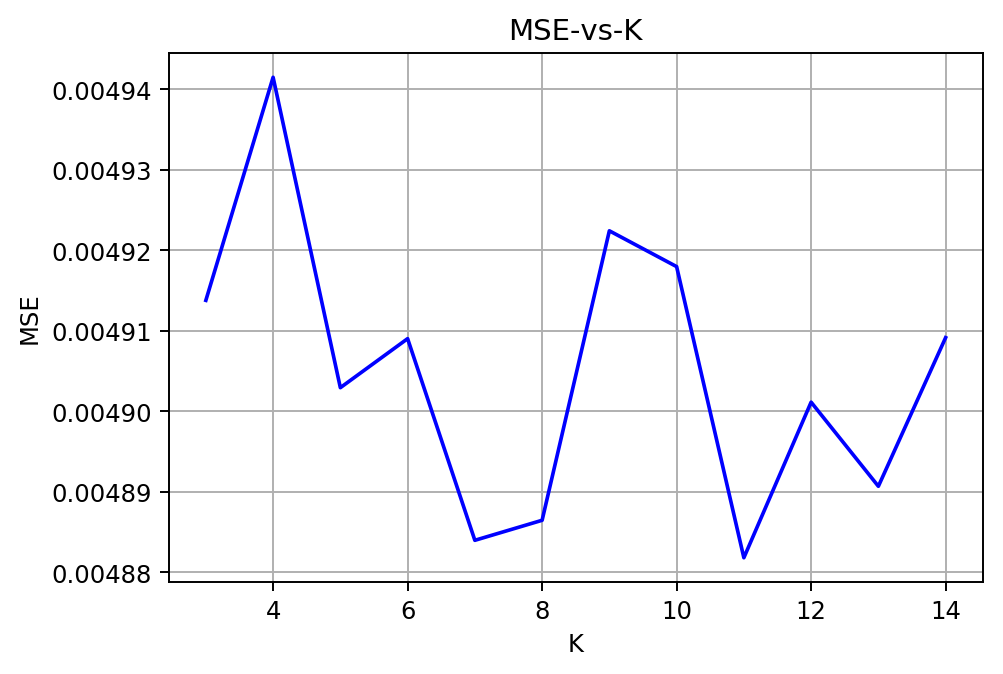

In [18]:
plotter('K','MSE','MSE-vs-K',k_values,mseK_list)
